In [1]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten

2024-10-30 20:43:24.855318: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
file = h5py.File('xy.h5', 'r')

x = file['x'][:]
y = file['y'][:]

x.shape, y.shape

((50000, 3521), (50000,))

In [3]:
x

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.2308653e-03,
        1.3833597e-02, 1.0827018e-04],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0722750e-02,
        1.7263571e-03, 3.5908230e-05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.7337386e-03,
        9.0888692e-03, 5.3032003e-05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.1522368e-04,
        1.5404505e-03, 4.8406710e-06],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 7.7867080e-03,
        4.9497960e-03, 1.4189112e-02],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.3136374e-02,
        1.9118838e-02, 9.5778385e-05]], dtype=float32)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((40000, 3521), (40000,), (10000, 3521), (10000,))

In [5]:
model = Sequential([
    Input(shape=(3521,)),
    Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3522      
                                                                 
Total params: 3522 (13.76 KB)
Trainable params: 3522 (13.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
optimizer = Adam(learning_rate=.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy','mse'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=256, batch_size=32)

Epoch 1/256
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6930 - accuracy: 0.5055 - mse: 0.2499 - val_loss: 0.6928 - val_accuracy: 0.5146 - val_mse: 0.2498
Epoch 2/256
1250/1250 [==============================] - 2s 2ms/step - loss: 0.6925 - accuracy: 0.5182 - mse: 0.2497 - val_loss: 0.6927 - val_accuracy: 0.5169 - val_mse: 0.2498
Epoch 3/256
1250/1250 [==============================] - 2s 1ms/step - loss: 0.6921 - accuracy: 0.5221 - mse: 0.2495 - val_loss: 0.6926 - val_accuracy: 0.5151 - val_mse: 0.2497
Epoch 4/256
1250/1250 [==============================] - 1s 1ms/step - loss: 0.6918 - accuracy: 0.5232 - mse: 0.2493 - val_loss: 0.6925 - val_accuracy: 0.5150 - val_mse: 0.2497
Epoch 5/256
1250/1250 [==============================] - 2s 1ms/step - loss: 0.6916 - accuracy: 0.5250 - mse: 0.2492 - val_loss: 0.6925 - val_accuracy: 0.5139 - val_mse: 0.2497
Epoch 6/256
1250/1250 [==============================] - 1s 1ms/step - loss: 0.6914 - accuracy: 0.5257 - mse: 0.249

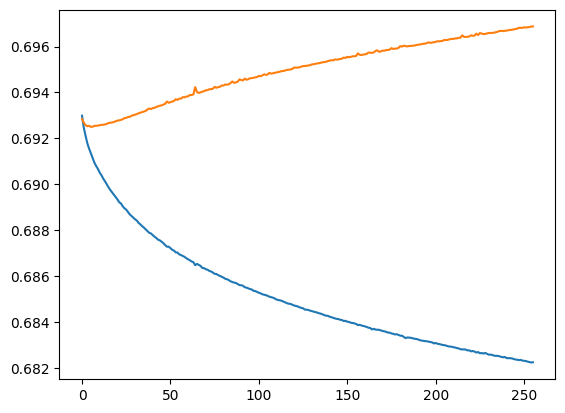

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.show()

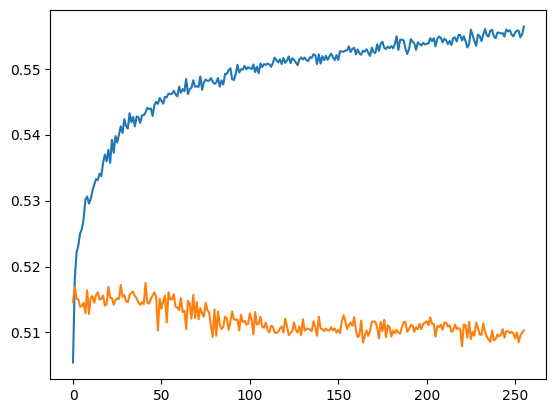

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.show()